# 4 Getting started with neural networks: Classification and regression

- accuracy
  - `accuracy = correct / total`
- confussion matrix
  - detailed report of a classifier success

|     | +ve | -ve |
| --- | --- | --- |
| +ve | TP | FP |
| +ve | FN | TN |

- Preceision and recall
  -  `preceision = TP / (TP + FP )`
  -  `recall = TP / (TP + FN )` 

#### Classification and regression glossary

- Sample or input
  - One data point that goes into your model.
- Prediction or output
  - What comes out of your model.
- Target
  - The truth. What your model should ideally have predicted, according to an external source of data.
- Prediction error or loss value
  - A measure of the distance between your model’s prediction and the target.
- Classes
  - A set of possible labels to choose from in a classification problem. For example, when classifying cat and dog pictures, “dog” and “cat” are the two classes.
- Label
  - A specific instance of a class annotation in a classification problem. For instance, if picture no. 1234 is annotated as containing the class “dog,” then “dog” is a label of picture no. 1234.
- Ground-truth or annotations
  -All targets for a dataset, typically collected by humans.
- Binary classification
  - A classification task where each input sample should be categorized into two exclusive categories.
  - two classes (1 or 0)
- Multiclass classification
  - A classification task where each input sample should be categorized into more than two categories: for instance, classifying handwritten digits.
- Multilabel classification
  - A classification task where each input sample can be assigned multiple labels. For instance, a given image may contain both a cat and a dog and should be annotated both with the “cat” label and the “dog” label. The number of labels per image is usually variable.
- Scalar regression
  - A task where the target is a continuous scalar value. Predicting house prices is a good example: the different target prices form a continuous space.
- Vector regression
  - A task where the target is a set of continuous values: for example, a continuous vector. If you’re doing regression against multiple values (such as the coordinates of a bounding box in an image), then you’re doing vector regression.
- Mini-batch or batch
  - A small set of samples (typically between 8 and 128) that are processed simultaneously by the model. The number of samples is often a power of 2, to facilitate memory allocation on GPU. When training, a mini-batch is used to compute a single gradient-descent update applied to the weights of the model.


## 4.1 Classifying movie reviews: A binary classification example

- classify movie reviews as positive or negative, based on the text content of the reviews.

### 4.1.1 The IMDB dataset

- 50,000 highly polarized reviews from the Internet Movie Database
- 25,000 reviews for training
- 25,000 reviews for testing
- each set consisting
  - 50% negative reviews
  - 50% positive reviews
- already been preprocessed
  - the reviews (sequences of words) have been turned into sequences of integers
  - each integer stands for a specific word in a dictionary.

In [1]:
# Listing 4.1 Loading the IMDB dataset
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

- The argument num_words=10000 is to keep the top 10,000 most frequently occurring words in the training data. 
- Rare words will be discarded. 
- This allows us to work with vector data of manageable size.

In [2]:
# shape of data
print("Shape of training data : ",train_data.shape)
print("Shape of training labels : ",train_labels.shape)
print("Shape of testing data : ",test_data.shape)
print("Shape of training labels : ",train_labels.shape)

Shape of training data :  (25000,)
Shape of training labels :  (25000,)
Shape of testing data :  (25000,)
Shape of training labels :  (25000,)


In [3]:
# samples of data
print("1st review from training data : ",train_data[0])
print("1st label from training data : ",train_labels[0])
print("1st review from testing data : ",test_data[0])
print("1st label from testing data : ",test_labels[0])


1st review from training data :  [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1st label from training dat

- reviews
  - 1 for +ve
  - 0 for -ve
- as we’re restricting ourselves to the top 10,000 most frequent words, no word index will exceed 10,000


In [4]:
# find max value from sequence
print("Maximum number in any sequence : ",max([max(sequence) for sequence in train_data]))

Maximum number in any sequence :  9999


In [5]:
# Listing 4.2 Decoding reviews back to text
# load word index
word_index = imdb.get_word_index()
# reverse the dic so numbers come first and then word
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) 
# indices are offset by 3
# 0, 1, and 2 are reserved indices for “padding,” “start of sequence,” and “unknown.”
decoded_review = " ".join([reverse_word_index.get(i-3, "?") for i in train_data[0]])
print("1st review from training data : ",decoded_review)

1st review from training data :  ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for 

### 4.1.2 Preparing the data

-  a neural network expects to process contiguous batches of data
- turn lists into tensors
  - Pad your lists so that they all have the same length, turn them into an integer tensor of shape `(samples, max_length)`, and start your model with a layer capable of handling such integer tensors (the
Embedding layer)
  - Multi-hot encode your lists to turn them into vectors of 0s and 1s. This would mean, for instance, turniing the sequence [8, 5] into a 10,000-dimensional vector that would be all 0s except for indices 8 and 5, which would be 1s. Then you could use a Dense layer, capable of handling floating-point vector data, as the first layer in your model.

In [2]:
# Listing 4.3 Encoding the integer sequences via multi-hot encoding
import numpy as np 
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data) 

In [3]:
# vectorize labels
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [8]:
# samples of data
print("1st review from training data after vectorization : ",x_train[0])
print("1st label from training data after vectorization: ",y_train[0])
print("1st review from testing data after vectorization: ",x_test[0])
print("1st label from testing data after vectorization: ",y_test[0])

1st review from training data after vectorization :  [0. 1. 1. ... 0. 0. 0.]
1st label from training data after vectorization:  1.0
1st review from testing data after vectorization:  [0. 1. 1. ... 0. 0. 0.]
1st label from testing data after vectorization:  0.0


### 4.1.3 Building your model

- input data
  - vectors
- labels
  - scalars (1s and 0s)
- model
  - Dense layers
    - 2 intermediate layers, 16 units each
    - A third layer that will output the scalar prediction regarding the sentiment of the current review
  - relu activation

In [9]:
# Listing 4.4 Model definition
from tensorflow import keras 
from tensorflow.keras import layers
 
model = keras.Sequential([
  layers.Dense(16, activation="relu"),
  layers.Dense(16, activation="relu"),
  layers.Dense(1, activation="sigmoid")
])

- Argumnets
  - first argument
    - number of units in the layer
    - the dimensionality of representation space of the layer.
    - Having more units allows model to learn more-complex representations, but it makes the model more computationally expensive and may lead to learning unwanted patterns
  - second argument
    - activation function layer.
- relu activation
  - eleminate -ve while return +ve as it is
  - `output = relu(dot(input, W) + b)`
    - W will have shape (input_dimension, number_of_units)
    - the dot product with W will project the input data onto a 16-dimensional representation space
- sigmoid activation
  - probability of a single quantity


- for compilation we need to chose 
  - loss function
    - mean_squared_error
      - binary classification
    - binary_crossentropy
      - binary classification problem
      - output is probability
        -  Crossentropy 
          - measures the distance between probability distributions
          - measures the distance between between the ground-truth distribution and predictions
  - optimizer
    - rmsprop
      - good default choice for virtually any problem.

In [10]:
# isting 4.5 Compiling the model
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"])

### 4.1.4 Validating your approach

- never be evaluated on its training data
- use a validation set to monitor the accuracy of the model during training

In [4]:
# Listing 4.6 Setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

- Train the model
  - 20 apochs
  - batch of 512 samples
  - moniter loss and accuracy on splitted data

In [12]:
#  Listing 4.7 Training your model
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
30/30 [==============================] - 2s 43ms/step - loss: 0.5368 - accuracy: 0.7882 - val_loss: 0.4194 - val_accuracy: 0.8436
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3225 - accuracy: 0.8952 - val_loss: 0.3121 - val_accuracy: 0.8844
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2340 - accuracy: 0.9235 - val_loss: 0.2815 - val_accuracy: 0.8905
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1836 - accuracy: 0.9401 - val_loss: 0.3116 - val_accuracy: 0.8740
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1503 - accuracy: 0.9521 - val_loss: 0.2825 - val_accuracy: 0.8870
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1261 - accuracy: 0.9613 - val_loss: 0.3125 - val_accuracy: 0.8803
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1024 - accuracy: 0.9695 - val_loss: 0.3105 - val_accuracy: 0.8827
Epoch 8/20
30

- History object
  - a dictionary containing data about everything that happened during training.

In [13]:
# check history object
print("History of model fitting : ")
history_dict = history.history
print(history_dict)
print("dictonary keys : ")
print(history_dict.keys())

History of model fitting : 
{'loss': [0.5368212461471558, 0.32247278094291687, 0.2340405136346817, 0.18363220989704132, 0.15032555162906647, 0.12610067427158356, 0.10235955566167831, 0.08585911989212036, 0.07194250822067261, 0.05861682444810867, 0.04916830360889435, 0.03873392567038536, 0.032270368188619614, 0.026231376454234123, 0.019800540059804916, 0.017280997708439827, 0.014368715696036816, 0.008346964605152607, 0.00918675772845745, 0.008237346075475216], 'accuracy': [0.7882000207901001, 0.8952000141143799, 0.9235333204269409, 0.9400666952133179, 0.9521333575248718, 0.9613333344459534, 0.9694666862487793, 0.975600004196167, 0.9798666834831238, 0.9841333627700806, 0.9869333505630493, 0.9919333457946777, 0.9937333464622498, 0.995199978351593, 0.9968000054359436, 0.9972666501998901, 0.9975333213806152, 0.9995333552360535, 0.9987999796867371, 0.9983999729156494], 'val_loss': [0.41944965720176697, 0.31210950016975403, 0.2814846336841583, 0.3115677237510681, 0.2825174629688263, 0.3124616

In [5]:
# Listing 4.8 Plotting the training and validation loss
import matplotlib.pyplot as plt
def plot_loss(historyDic):
  history_dict = historyDic.history
  loss_values = history_dict["loss"]
  val_loss_values = history_dict["val_loss"]
  epochs = range(1, len(loss_values) + 1)
  plt.clf()
  plt.plot(epochs, loss_values, "bo", label="Training loss")
  plt.plot(epochs, val_loss_values, "b", label="Validation loss")
  plt.title("Training and validation loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

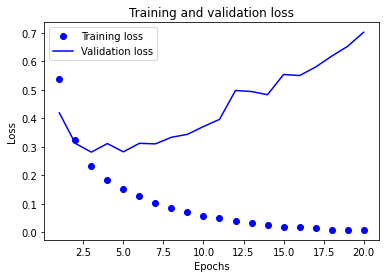

In [15]:
plot_loss(history)

In [6]:
# Listing 4.9 Plotting the training and validation accuracy
def plot_acc(historyDic):
  history_dict = historyDic.history
  acc = history_dict["accuracy"]
  val_acc = history_dict["val_accuracy"]
  epochs = range(1, len(acc) + 1)
  plt.clf()
  plt.plot(epochs, acc, "bo", label="Training acc")
  plt.plot(epochs, val_acc, "b", label="Validation acc")
  plt.title("Training and validation accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.show()

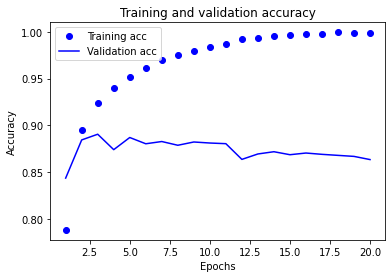

In [17]:
plot_acc(history)

- running gradient-descent optimization
  - the quantity trying to minimize should be less with every iteration
  - training loss decreases with every epoch, and the training accuracy increases with every epoch.
  - But that isn’t the case for the validation loss
and accuracy
    - they seem to peak at the fourth epoch.
- overfitting
  - a model that performs better on the training data isn’t necessarily a model that will do better on data
it has never seen before.
  - after the fifth epoch, overoptimizing on the training data
  - end up learning representations that are specific to the training data and don’t generalize to data outside of the training set.

In [18]:
# Listing 4.10 Retraining a model from scratch
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=5, batch_size=512)

Epoch 1/5
49/49 [==============================] - 1s 13ms/step - loss: 0.4564 - accuracy: 0.8157
Epoch 2/5
49/49 [==============================] - 1s 13ms/step - loss: 0.2583 - accuracy: 0.9106
Epoch 3/5
49/49 [==============================] - 1s 13ms/step - loss: 0.2007 - accuracy: 0.9300
Epoch 4/5
49/49 [==============================] - 1s 13ms/step - loss: 0.1682 - accuracy: 0.9406
Epoch 5/5
49/49 [==============================] - 1s 18ms/step - loss: 0.1432 - accuracy: 0.9502


In [19]:
# evaluate on test data
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 3s 3ms/step - loss: 0.3410 - accuracy: 0.8694


In [20]:
results

[0.3409577012062073, 0.8693600296974182]

- results in an accuracy of 88%

### 4.1.5 Using a trained model to generate predictions on new data

In [21]:
model.predict(x_test)

array([[0.11586657],
       [0.9999598 ],
       [0.64300513],
       ...,
       [0.06897787],
       [0.04634608],
       [0.35087636]], dtype=float32)

# 4.1.6 Further experiments

#### try one representation layer, and see how doing so affects validation and test accuracy.

In [7]:
from tensorflow import keras 
from tensorflow.keras import layers

In [8]:
model = keras.Sequential([
  layers.Dense(16, activation="relu"),
  layers.Dense(1, activation="sigmoid")
])
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"])
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
30/30 [==============================] - 2s 43ms/step - loss: 0.4992 - accuracy: 0.7939 - val_loss: 0.4128 - val_accuracy: 0.8384
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3160 - accuracy: 0.9033 - val_loss: 0.3182 - val_accuracy: 0.8874
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2440 - accuracy: 0.9241 - val_loss: 0.2885 - val_accuracy: 0.8925
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1999 - accuracy: 0.9401 - val_loss: 0.3143 - val_accuracy: 0.8726
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1695 - accuracy: 0.9484 - val_loss: 0.2784 - val_accuracy: 0.8885
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1463 - accuracy: 0.9573 - val_loss: 0.2793 - val_accuracy: 0.8870
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1259 - accuracy: 0.9645 - val_loss: 0.2812 - val_accuracy: 0.8886
Epoch 8/20
30

In [9]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 3s 4ms/step - loss: 0.5127 - accuracy: 0.8564


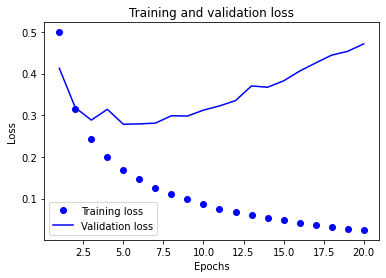

In [10]:
plot_loss(history)

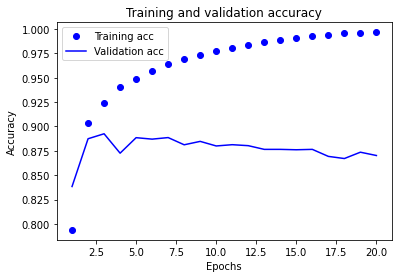

In [11]:
plot_acc(history)

In [12]:
results

[0.5127049684524536, 0.856440007686615]

#### Try using three representation layers, and see how doing so affects validation and test accuracy.

In [13]:
model = keras.Sequential([
  layers.Dense(16, activation="relu"),
  layers.Dense(16, activation="relu"),
  layers.Dense(16, activation="relu"),
  layers.Dense(1, activation="sigmoid")
])
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"])
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
30/30 [==============================] - 2s 37ms/step - loss: 0.5319 - accuracy: 0.7842 - val_loss: 0.4136 - val_accuracy: 0.8577
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3171 - accuracy: 0.9025 - val_loss: 0.3137 - val_accuracy: 0.8817
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2257 - accuracy: 0.9291 - val_loss: 0.2959 - val_accuracy: 0.8829
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1732 - accuracy: 0.9409 - val_loss: 0.2772 - val_accuracy: 0.8883
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1402 - accuracy: 0.9545 - val_loss: 0.2916 - val_accuracy: 0.8838
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1147 - accuracy: 0.9645 - val_loss: 0.2995 - val_accuracy: 0.8871
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.0904 - accuracy: 0.9729 - val_loss: 0.3546 - val_accuracy: 0.8740
Epoch 8/20
30

In [14]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 3s 4ms/step - loss: 0.8191 - accuracy: 0.8512


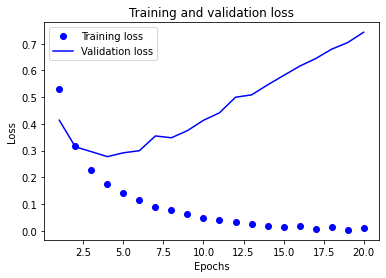

In [15]:
plot_loss(history)

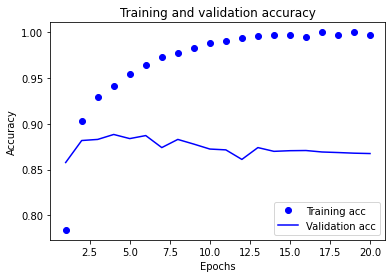

In [16]:
plot_acc(history)

In [17]:
results

[0.8191365003585815, 0.8512399792671204]

#### Try using layers with more units

In [18]:
model = keras.Sequential([
  layers.Dense(32, activation="relu"),
  layers.Dense(32, activation="relu"),
  layers.Dense(1, activation="sigmoid")
])
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"])
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
30/30 [==============================] - 2s 37ms/step - loss: 0.4834 - accuracy: 0.7823 - val_loss: 0.3720 - val_accuracy: 0.8487
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2603 - accuracy: 0.9065 - val_loss: 0.3005 - val_accuracy: 0.8819
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2012 - accuracy: 0.9271 - val_loss: 0.3640 - val_accuracy: 0.8516
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1529 - accuracy: 0.9481 - val_loss: 0.2863 - val_accuracy: 0.8908
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1198 - accuracy: 0.9602 - val_loss: 0.3450 - val_accuracy: 0.8702
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0967 - accuracy: 0.9688 - val_loss: 0.3482 - val_accuracy: 0.8779
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0793 - accuracy: 0.9753 - val_loss: 0.3696 - val_accuracy: 0.8786
Epoch 8/20
30

In [19]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 3s 4ms/step - loss: 0.8850 - accuracy: 0.8516


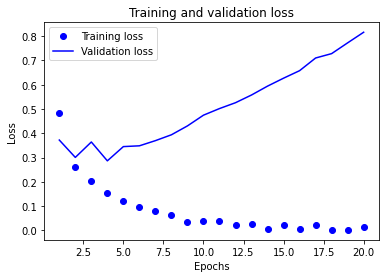

In [20]:
plot_loss(history)

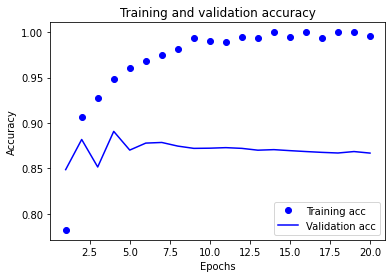

In [21]:
plot_acc(history)

In [22]:
results

[0.8850233554840088, 0.8515999913215637]

#### Try using layers with less units

In [23]:
model = keras.Sequential([
  layers.Dense(8, activation="relu"),
  layers.Dense(8, activation="relu"),
  layers.Dense(1, activation="sigmoid")
])
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"])
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
30/30 [==============================] - 2s 38ms/step - loss: 0.5250 - accuracy: 0.7857 - val_loss: 0.4123 - val_accuracy: 0.8604
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3335 - accuracy: 0.8977 - val_loss: 0.3310 - val_accuracy: 0.8788
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2520 - accuracy: 0.9216 - val_loss: 0.2898 - val_accuracy: 0.8912
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2014 - accuracy: 0.9368 - val_loss: 0.2782 - val_accuracy: 0.8908
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1696 - accuracy: 0.9470 - val_loss: 0.2816 - val_accuracy: 0.8862
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1416 - accuracy: 0.9563 - val_loss: 0.2834 - val_accuracy: 0.8866
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1217 - accuracy: 0.9630 - val_loss: 0.2854 - val_accuracy: 0.8871
Epoch 8/20
30

In [24]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 3s 4ms/step - loss: 0.6210 - accuracy: 0.8540


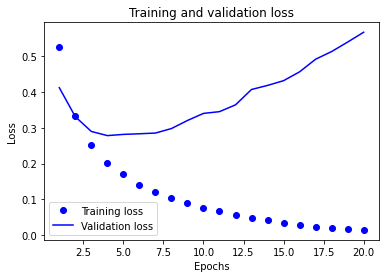

In [25]:
plot_loss(history)

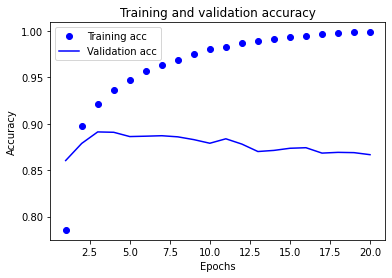

In [26]:
plot_acc(history)

In [27]:
results

[0.6210241913795471, 0.8540400266647339]

#### Try using the mse loss function instead of binary_crossentropy

In [28]:
model = keras.Sequential([
  layers.Dense(16, activation="relu"),
  layers.Dense(16, activation="relu"),
  layers.Dense(1, activation="sigmoid")
])
model.compile(
    optimizer="rmsprop",
    loss="mse",
    metrics=["accuracy"])
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
30/30 [==============================] - 2s 42ms/step - loss: 0.1683 - accuracy: 0.7791 - val_loss: 0.1294 - val_accuracy: 0.8400
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0909 - accuracy: 0.9069 - val_loss: 0.0932 - val_accuracy: 0.8875
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0654 - accuracy: 0.9284 - val_loss: 0.0928 - val_accuracy: 0.8776
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0511 - accuracy: 0.9481 - val_loss: 0.0836 - val_accuracy: 0.8886
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0420 - accuracy: 0.9560 - val_loss: 0.0852 - val_accuracy: 0.8856
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0340 - accuracy: 0.9673 - val_loss: 0.0908 - val_accuracy: 0.8770
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0276 - accuracy: 0.9747 - val_loss: 0.0876 - val_accuracy: 0.8816
Epoch 8/20
30

In [29]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 3s 4ms/step - loss: 0.1199 - accuracy: 0.8538


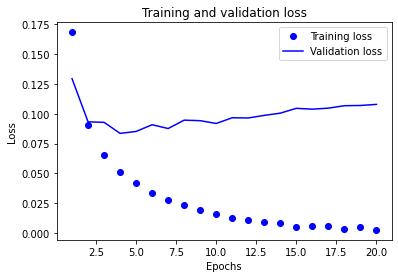

In [30]:
plot_loss(history)

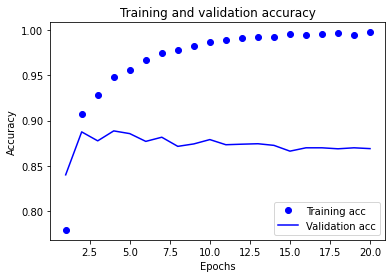

In [31]:
plot_acc(history)

In [32]:
results

[0.11993404477834702, 0.8537999987602234]

#### Try using the tanh activation instead of relu .


In [33]:
model = keras.Sequential([
  layers.Dense(16, activation="tanh"),
  layers.Dense(16, activation="tanh"),
  layers.Dense(1, activation="sigmoid")
])
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"])
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
30/30 [==============================] - 2s 42ms/step - loss: 0.4792 - accuracy: 0.7981 - val_loss: 0.3505 - val_accuracy: 0.8729
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2690 - accuracy: 0.9093 - val_loss: 0.3105 - val_accuracy: 0.8727
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1931 - accuracy: 0.9343 - val_loss: 0.2709 - val_accuracy: 0.8881
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1466 - accuracy: 0.9503 - val_loss: 0.2897 - val_accuracy: 0.8849
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1117 - accuracy: 0.9647 - val_loss: 0.3078 - val_accuracy: 0.8814
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0907 - accuracy: 0.9700 - val_loss: 0.3787 - val_accuracy: 0.8709
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0705 - accuracy: 0.9780 - val_loss: 0.3782 - val_accuracy: 0.8788
Epoch 8/20
30

In [34]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 3s 3ms/step - loss: 0.9547 - accuracy: 0.8448


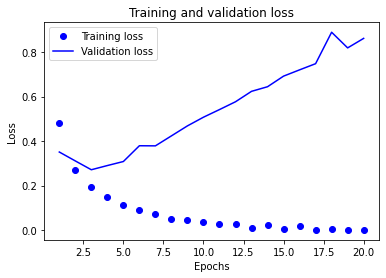

In [35]:
plot_loss(history)

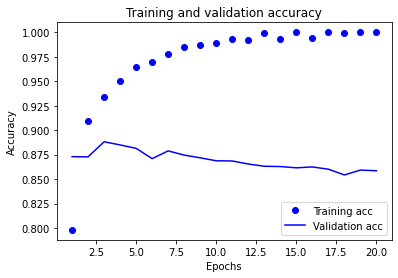

In [36]:
plot_acc(history)

In [37]:
results

[0.9546788930892944, 0.8448399901390076]

### 4.1.7 Wrapping up

- You usually need to do quite a bit of preprocessing on your raw data in order to be able to feed it—as tensors—into a neural network. Sequences of words can be encoded as binary vectors, but there are other encoding options too.
- Stacks of Dense layers with relu activations can solve a wide range of problems (including sentiment classification), and you’ll likely use them frequently.
- In a binary classification problem (two output classes), your model should end with a Dense layer with one unit and a sigmoid activation: the output of your model should be a scalar between 0 and 1, encoding a probability.
- With such a scalar sigmoid output on a binary classification problem, the loss function you should use is binary_crossentropy .
- The rmsprop optimizer is generally a good enough choice, whatever your problem. That’s one less thing for you to worry about.
- As they get better on their training data, neural networks eventually start overfitting and end up obtaining increasingly worse results on data they’ve never seen before. Be sure to always monitor performance on data that is outside of the training set.